## JuPedSim

In diesem Tutorial wird eine Simulation mit `jpscore` in einem einfachen Setup durchgeführt. 

Eine Dokumentation der verwendeten Dateien ist unter:

- Die Trajektorie-Datei (txt oder xml) (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_trajectory.html))
- Die Geometriedatei (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_geometry.html)) 
- Die Projektdatei von jpscore, genannt inifile (siehe [Dokumentation](http://www.jupedsim.org/jpscore/jpscore_inifile.html))


## Wie benutze ich ein Jupyter-Notebook

Dieser `Jupyter-notebook` besteht aus verschiedennen Zellen (Cells). 

Sie können alle Zellen ausführen indem Sie in dem Menü `Run --> Run All Cells` auswählen.

Alternative, können Sie einzelne Zellen ausführen, indem Sie auf die entsprechende Zelle klicken und `Run --> Run Selected Cells` auswählen. 


**Tip**: Die Ausführung von einer ausgewählten Zelle geht auch mit dem Kürzel `Alt+Enter` (Also auf den Tasten `Alt` und `Enter` gleichzeitig drücken)

Mehr Information kann man [hier](https://docs.microsoft.com/de-de/azure/notebooks/tutorial-create-run-jupyter-notebook) finden.

## Simulation

Mit den Dateien `ini_jpscore.xml` und `geometry.xml` können wir eine einfache Simulation wie folgt durchführen:

In [4]:
%run 00_Install.ipynb

Did not recognize the distribution (should be Ubuntu or Debian)


In [5]:
%%bash
/Users/chraibi/workspace/jupedsim/jpscore/build/bin/jpscore ini_jpscore.xml

[2020-05-01 12:50:48.479] [info] Starting JuPedSim - JPScore
[2020-05-01 12:50:48.479] [info] Version 0.8.4
[2020-05-01 12:50:48.479] [info] Commit id v0.8.4-952-ga8dfe79e
[2020-05-01 12:50:48.479] [info] Commit date Fri Apr 24 13:34:13 2020
[2020-05-01 12:50:48.479] [info] Build from branch master
[2020-05-01 12:50:48.479] [info] Build with clang++(11.0.0)
[2020-05-01 12:50:48.480] [info] Loading and parsing the project file <ini_jpscore.xml>
[2020-05-01 12:50:48.480] [info] Random seed <12542>
[2020-05-01 12:50:48.480] [info] Maximal simulation time <100.00> seconds
[2020-05-01 12:50:48.480] [info] Geometry file <geometry.xml>
[2020-05-01 12:50:48.480] [info] Using 1 OpenMP threads, 1 available.
[2020-05-01 12:50:48.480] [info] Show statistics: true
[2020-05-01 12:50:48.480] [info] Output Path configured </Users/chraibi/Downloads/jupedsim/results>
[2020-05-01 12:50:48.480] [info] Output file  </Users/chraibi/Downloads/jupedsim/results/trajectories.txt>
[2020-05-01 12:50:48.480] [info

# Visualisierung der Trajektorien

*Warnung*: Die Visualisierung einer großen Trajektoriendatei kann einige Minuten dauern. Also, Geduld! 

Der Name der Geometrie- und Trajektorie-Dateien werden automatisch aus der Ini-Datei extrahiert. 
Darüber hinaus wird auch der Wert der Frames pro Sekunde (*fps*) aus der Ini-Datei extrahiert.

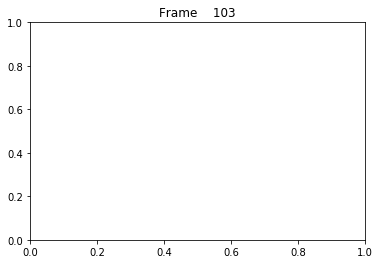

Frame  - min:      0 - max:    104
PersID - min:      1 - max:     30
Xmin:   0.23 m - Xmax:   7.99 m
Ymin:   0.60 m - Ymax:   4.80 m
Zmin:   0.00 m - Zmax:   0.00 m


In [6]:
%run 02_vis.ipynb
HTML(ani.to_html5_video())

----

## N(t)-Kurve zeichnen

In dem Ordner `results` wird eine Flow-Datei erzeugt, die zwei Spalten enthält:

Abhängig von der Trajektoriennamen könnte diese Datei so heissen `flow_exit_id_0_trajectories.txt`.

**Achtung:**
Wenn die Trajektoriendatei in der `ini_jpscore.xml` geändert wird, muss der Wert der Variable `Nt_file` (siehe Zelle unten) dementsprechend **angepasst** werden.

Zum Beispiel: 

| Trajektorienname  |  Flow-Datei |
| ------------- |:-------------:|
| trajectories_50.txt | flow_exit_id_0_trajectories_50.txt|
| trajectories_100.txt | flow_exit_id_0_trajectories_100.txt|




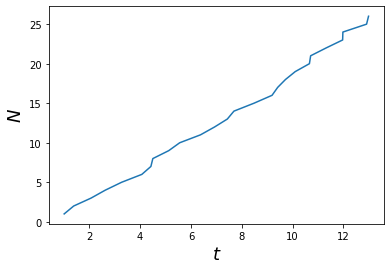

In [7]:
%run libs/imports
%matplotlib inline
Nt_file="results/flow_exit_id_0_trajectories.txt"
libs_path = 'libs'
if libs_path not in sys.path:
    sys.path.append(libs_path)


if not os.path.exists(Nt_file):
    print("File {} does not exist".format(Nt_file))
else:
    data = np.loadtxt(Nt_file)
    plt.plot(data[:, 0],data[:,1])
    plt.xlabel("$t$", size=18)
    plt.ylabel("$N$", size=18)

## Aufräumen

Löschen des
Dieser Schritt ist **optional**. 

Um den Simulationsordners `results` zu löschen, entfernen Sie von der Zelle unten das Zeichen `#` und führen Sie anschliessen die Zelle mie `Alt+Enter` 

In [8]:
%%bash
#rm -r results 